Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection  import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Load the dataset

In [2]:
data = pd.read_csv("/content/abalone.csv")

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Perform Below Visualizations

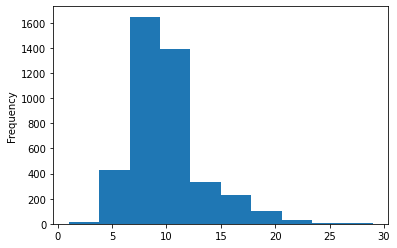

In [4]:
data['Rings'].plot(kind='hist')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f735fb0a510>,
 'caps': [<matplotlib.lines.Line2D at 0x7f735f69b750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f735f694810>],
 'medians': [<matplotlib.lines.Line2D at 0x7f735f6a3250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f735f6a3790>],
 'means': []}

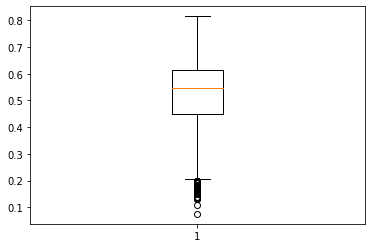

In [5]:
plt.boxplot(data['Length'])

<BarContainer object of 4177 artists>

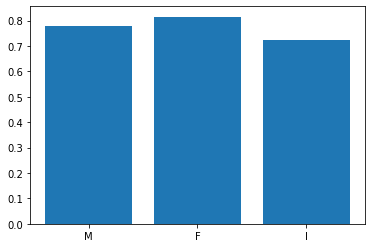

In [6]:
df = pd.DataFrame(data)
X = list(df.iloc[:,0])
Y = list(df.iloc[:,1])
plt.bar(X,Y)

<BarContainer object of 4177 artists>

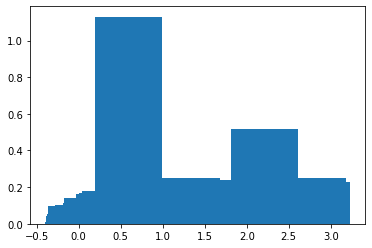

In [7]:
plt.bar(data['Whole weight'],data['Height'])


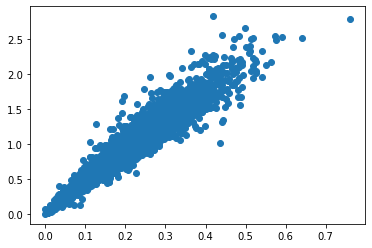

In [8]:
plt.scatter(data['Viscera weight'],data['Whole weight'])

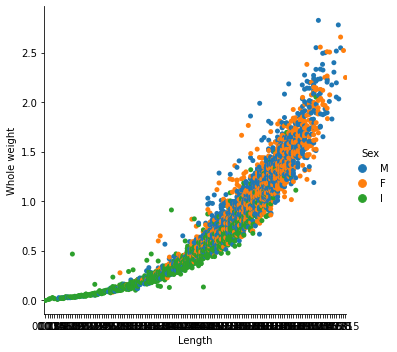

In [9]:
sns.catplot(data=data,x='Length',y='Whole weight',hue='Sex')

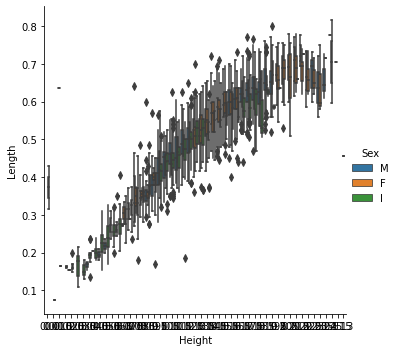

In [10]:
sns.catplot(data=data,x='Height',y='Length',hue='Sex',kind='box')

Perform descriptive statistics on the dataset.

In [11]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length            0.523992
Diameter          0.407881
Height            0.139516
Whole weight      0.828742
Shucked weight    0.359367
Viscera weight    0.180594
Shell weight      0.238831
Rings             9.933684
dtype: float64

In [12]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
dtype: float64

In [13]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [14]:
data.shape

(4177, 9)

Checking for null values

In [15]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Find the outliers and replace them outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


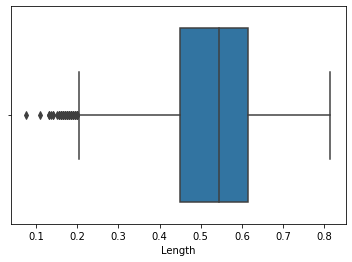

In [16]:
sns.boxplot(data['Length'])

In [17]:
qnt = data.quantile(q=[0.25,0.75])
qnt

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,8.0
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,11.0


In [18]:
IQR = qnt.loc[0.75] - qnt.loc[0.25]
IQR

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Rings             3.0000
dtype: float64

In [19]:
upper_extreme = qnt.loc[0.75]+1.5*IQR
upper_extreme

Length             0.86250
Diameter           0.67500
Height             0.24000
Whole weight       2.22025
Shucked weight     0.97600
Viscera weight     0.49225
Shell weight       0.62750
Rings             15.50000
dtype: float64

In [20]:
lower_extreme = qnt.loc[0.25]-1.5*IQR
lower_extreme

Length            0.20250
Diameter          0.15500
Height            0.04000
Whole weight     -0.62575
Shucked weight   -0.28800
Viscera weight   -0.14575
Shell weight     -0.16850
Rings             3.50000
dtype: float64

In [21]:
df2 = data[(data['Length']<upper_extreme['Length']) & (data['Length']>lower_extreme['Length'])]
df.shape

(4177, 9)

In [22]:
df2.shape

(4128, 9)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


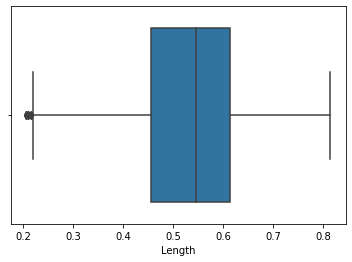

In [23]:
sns.boxplot(df2['Length'])

In [24]:
le = LabelEncoder()
df2['Sex'] = le.fit_transform(df2['Sex'])
df2['Length'] = le.fit_transform(df2['Length'])
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,50,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,29,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,65,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,47,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,25,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [25]:
x = df.iloc[:,:-1].values
x

array([['M', 0.455, 0.365, ..., 0.2245, 0.101, 0.15],
       ['M', 0.35, 0.265, ..., 0.0995, 0.0485, 0.07],
       ['F', 0.53, 0.42, ..., 0.2565, 0.1415, 0.21],
       ...,
       ['M', 0.6, 0.475, ..., 0.5255, 0.2875, 0.308],
       ['F', 0.625, 0.485, ..., 0.531, 0.261, 0.296],
       ['M', 0.71, 0.555, ..., 0.9455, 0.3765, 0.495]], dtype=object)

In [26]:
y = df.iloc[:,-1].values
y

array([15,  7,  9, ...,  9, 10, 12])

Scale the independent variables

In [27]:
scaler = MinMaxScaler()
df[['Length']] = scaler.fit_transform(df[['Length']])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.513514,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.371622,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.614865,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.493243,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.344595,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.662162,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.695946,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.709459,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.743243,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [28]:
x = data.drop('Rings', axis = 1)
y = data['Whole weight']

In [29]:
y

0       0.5140
1       0.2255
2       0.6770
3       0.5160
4       0.2050
         ...  
4172    0.8870
4173    0.9660
4174    1.1760
4175    1.0945
4176    1.9485
Name: Whole weight, Length: 4177, dtype: float64

In [30]:
train_size=0.05
X = df.drop(columns=['Sex']).copy()
Y = df['Length']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.1)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

        Length  Diameter  Height  Whole weight  Shucked weight  \
3509  0.770270     0.520   0.175        1.3345          0.6670   
1365  0.722973     0.475   0.170        1.0265          0.4350   
1518  0.804054     0.545   0.200        1.7025          0.8330   
3916  0.601351     0.410   0.160        0.7120          0.2845   
739   0.500000     0.345   0.090        0.3795          0.1430   
...        ...       ...     ...           ...             ...   
654   0.398649     0.280   0.110        0.2305          0.0945   
2495  0.506757     0.360   0.160        0.5670          0.1740   
3970  0.418919     0.285   0.090        0.2480          0.0935   
3128  0.750000     0.495   0.190        1.1655          0.5360   
1225  0.364865     0.255   0.085        0.2005          0.1050   

      Viscera weight  Shell weight  Rings  
3509          0.2665        0.3550     10  
1365          0.2335        0.3035     10  
1518          0.3740        0.4100     11  
3916          0.1530        0.2

Build the Model

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [32]:
lr.fit(X_train,Y_train)

LinearRegression()

In [33]:
pred = lr.predict(X_train)

In [34]:
pred

array([0.77027027, 0.72297297, 0.80405405, 0.60135135, 0.5       ,
       0.60135135, 0.50675676, 0.69594595, 0.52027027, 0.66891892,
       0.70945946, 0.48648649, 0.28378378, 0.75      , 0.40540541,
       0.68243243, 0.61486486, 0.76351351, 0.64864865, 0.66891892,
       0.73648649, 0.53378378, 0.69594595, 0.40540541, 0.87162162,
       0.64189189, 0.72972973, 0.57432432, 0.75675676, 0.50675676,
       0.62837838, 0.57432432, 0.68918919, 0.61486486, 0.25      ,
       0.73648649, 0.69594595, 0.68918919, 0.69594595, 0.55405405,
       0.18918919, 0.36486486, 0.41891892, 0.32432432, 0.76351351,
       0.41216216, 0.68918919, 0.79054054, 0.66891892, 0.58108108,
       0.67567568, 0.52027027, 0.5       , 0.53378378, 0.69594595,
       0.74324324, 0.63513514, 0.59459459, 0.72972973, 0.71621622,
       0.63513514, 0.64189189, 0.66216216, 0.50675676, 0.76351351,
       0.58783784, 0.85135135, 0.68243243, 0.61486486, 0.81756757,
       0.41216216, 0.75      , 0.48648649, 0.87162162, 0.72297